In [1]:
import sys
import os
# sys.path.append('/home/beinhaud/diplomka/mcs-source/evaluation_tools')
sys.path.append('/home/david/source/diplomka/evaluation_tools')

# os.environ['TIME_STEP'] = "20"
# os.environ['SIZE_MULTIPLIER'] = "0.1"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # use the second GPU

import numpy as np

import nn_model.globals
from nn_model.type_variants import PathDefaultFields
from nn_model.dataset_loader import different_times_collate_fn
from evaluation_tools.response_analyzer import ResponseAnalyzer, AnalyzerChoices
from evaluation_tools.plugins.histogram_processor import HistogramFields
from evaluation_tools.results_plotter import ResultsPlotter

import dataset_analysis

In [2]:
num_data_workers = 8
workers_enabled = num_data_workers > 0
data_workers_kwargs = {
    "collate_fn": different_times_collate_fn,
    "num_workers": num_data_workers,  # number of workers which will supply data to GPU
    "pin_memory": workers_enabled,  # speed up data transfer to GPU
    "prefetch_factor": (
        num_data_workers // 2 if workers_enabled else None
    ),  # try to always have 4 samples ready for the GPU
    "persistent_workers": workers_enabled,  # keep the worker threads alive
}

In [3]:
# HISTOGRAM_BASE_PATH = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/histograms/"
HISTOGRAM_BASE_PATH = f"{nn_model.globals.PROJECT_ROOT}/evaluation_tools/evaluation_results/histograms/"


VARIANT = AnalyzerChoices.HISTOGRAM_TRAIN.value
TIME_STEP = 20
HISTOGRAM_PATH = HISTOGRAM_BASE_PATH + f"{VARIANT}-{TIME_STEP}.pkl"

In [4]:
all_histograms = dataset_analysis.load_all_histograms(HISTOGRAM_BASE_PATH)
counts, differences, differences_normed =  dataset_analysis.check_spike_count_differences(all_histograms)


In [ ]:
counts
differences["histogram_train"][20]
differences_normed["histogram_train"][20]
differences_normed["histogram_test"][20]

x_on_counts = counts["histogram_train"][20]["histogram_experiment_counts"]["X_ON"]
x_on_differences = differences["histogram_train"][20]["histogram_experiment_counts"]["X_ON"]
print(differences["histogram_train"][20]["histogram_experiment_counts"]["X_ON"])
print(counts["histogram_train"][20]["histogram_experiment_counts"]["X_ON"])
print(x_on_differences / x_on_counts)


-68643330.0
6351362000.0


In [6]:
histogram_total_spikes = np.sum(all_histograms["histogram_train"][1][HistogramFields.HISTOGRAM_BIN_COUNTS.value]["X_ON"]) 
diff = np.sum(all_histograms["histogram_train"][1][HistogramFields.HISTOGRAM_BIN_COUNTS.value]["X_ON"]) - np.sum(all_histograms["histogram_train"][20][HistogramFields.HISTOGRAM_BIN_COUNTS.value]["X_ON"])
diff / (50000 * 7200)


np.float32(676.99994)

In [7]:
for variant, variant_values in all_histograms.items():
    print(f"Variant: {variant}")
    for time, time_values in variant_values.items():
        print(f"Time: {time}")
        for layer, layer_offsets in time_values.items():
        

SyntaxError: incomplete input (156107352.py, line 6)

In [ ]:
for variant, variant_values in all_offsets.items():
    print(f"Variant: {variant}")
    for time, time_values in variant_values.items():
        print(f"Time: {time}")
        for layer, layer_offsets in time_values.items():
            offset = np.sum(layer_offsets)
            print(f"Layer {layer}: {offset}")
            print(f"Normalized offset: {offset / nn_model.globals.ORIGINAL_SIZES[layer]}")

Variant: histogram_train
Time: 5
Layer X_ON: -98.0
Normalized offset: -0.013611110858619213
Layer X_OFF: 29.0
Normalized offset: 0.0040277778171002865
Layer V1_Exc_L4: -4290.0
Normalized offset: -0.1143999993801117
Layer V1_Inh_L4: 323.0
Normalized offset: 0.03445333242416382
Layer V1_Exc_L23: -992.0
Normalized offset: -0.026453332975506783
Layer V1_Inh_L23: -268.0
Normalized offset: -0.02858666703104973
Time: 10
Layer X_ON: -66.0
Normalized offset: -0.009166666306555271
Layer X_OFF: 157.0
Normalized offset: 0.021805554628372192
Layer V1_Exc_L4: -846.0
Normalized offset: -0.0225600004196167
Layer V1_Inh_L4: 11.0
Normalized offset: 0.0011733333813026547
Layer V1_Exc_L23: 672.0
Normalized offset: 0.017920000478625298
Layer V1_Inh_L23: -366.0
Normalized offset: -0.03903999924659729
Time: 15
Layer X_ON: -79.0
Normalized offset: -0.010972222313284874
Layer X_OFF: 151.0
Normalized offset: 0.020972222089767456
Layer V1_Exc_L4: -1451.0
Normalized offset: -0.03869333490729332
Layer V1_Inh_L4: 5

In [ ]:
all_histograms = {}
time_steps = [1, 5, 10, 15, 20]
variants = ["train", "test"]
for variant in variants:
    all_histograms[variant] = {}
    for time in time_steps:
        path = HISTOGRAM_BASE_PATH + f"{variant}-{time}.pkl"
        all_histograms[variant][time] = ResponseAnalyzer.load_pickle_file(HISTOGRAM_PATH)

In [ ]:
all_train = all_histograms["train"]
all_test = all_histograms["test"]
neurons_counts_1 = all_train[1][HistogramFields.HISTOGRAM_EXPERIMENTS_COUNTS.value]
neurons_counts_20 = all_train[20][HistogramFields.HISTOGRAM_EXPERIMENTS_COUNTS.value]

for time_bin in [5, 10, 15, 20]:
    time_bin_counts = all_histograms[time_bin][HistogramFields.HISTOGRAM_EXPERIMENTS_COUNTS.value]
    for layer, counts in time_bin_counts.items():
        difference += np.sum((neurons_counts_1[layer]-counts).reshape(-1), axis=0)
    
difference

0.0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `histogram_counts` and `bin_edges` are returned from `create_spikes_histogram_values`
histogram_fn_kwargs = {
    "layer": "X_ON",
    "subset": -1,
    "process_test": False,
    "include_input": True,
    "include_output": True,
    "num_bins": 21,
}

histogram_counts, bin_edges = histogram_firing_rates(20, histogram_fn_kwargs=histogram_fn_kwargs, data_workers_kwargs=data_workers_kwargs)

# Select the layer to plot
layer_to_plot = "X_ON"
counts = histogram_counts[layer_to_plot]  # Already normalized distribution
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers


print(len(counts))
print(len(bin_edges))
# Plot the histogram using sns.displot
sns.displot(
    # x=bin_centers,
    x=bin_edges[:-1],
    weights=counts,
    kind="hist",
    bins=len(bin_edges),
    kde=True,
    # color="blue",
    height=6,
    aspect=1.5,
)

# # Overlay the distribution as a line plot
# sns.lineplot(
#     x=bin_centers,
#     y=counts,
#     color="red",
#     label="Normalized Distribution",
# )

# Add labels and title
plt.xlabel("Spike Count Bins")
plt.ylabel("Density")
plt.title(f"Histogram and Distribution for Layer: {layer_to_plot}")
plt.legend()
plt.show()

NameError: name 'histogram_firing_rates' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

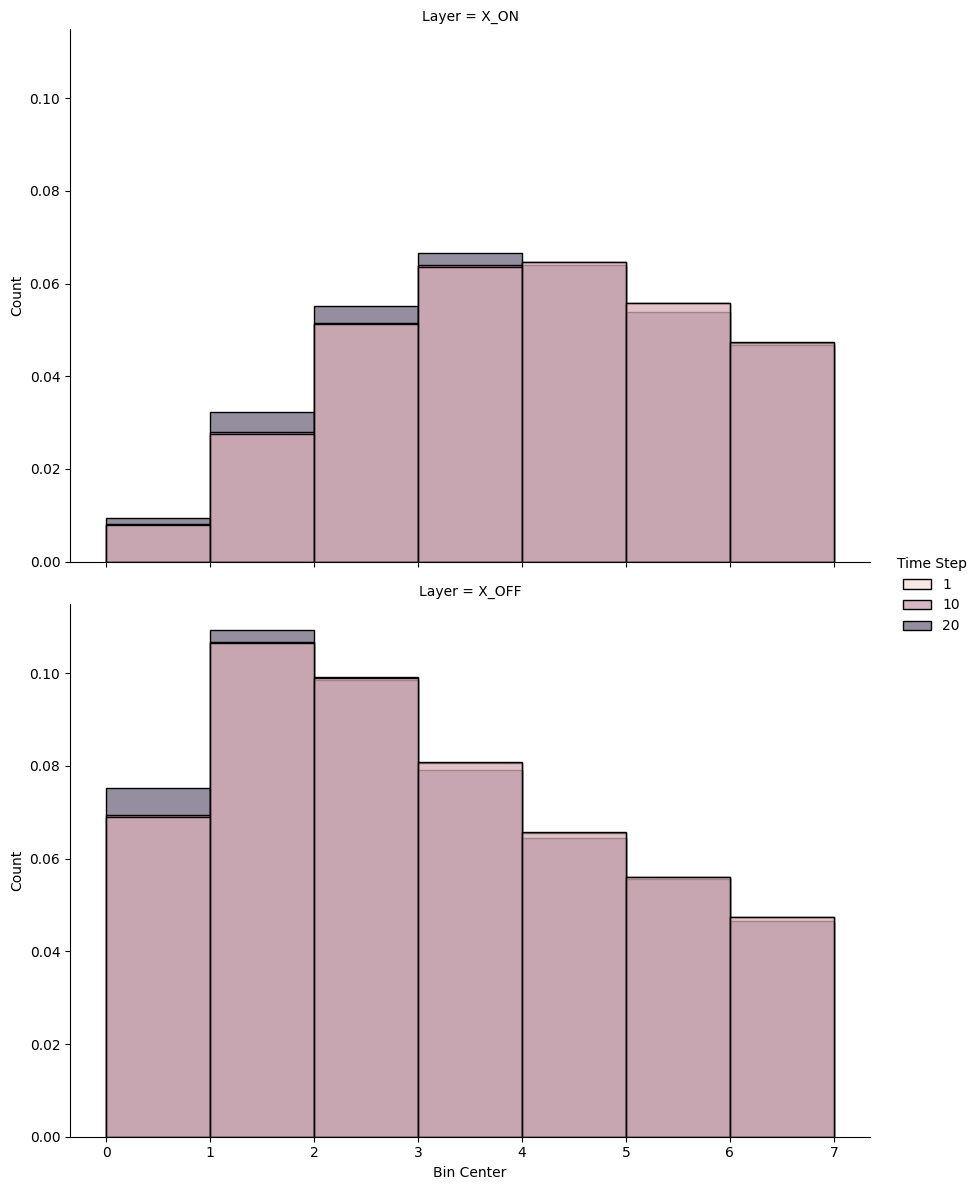

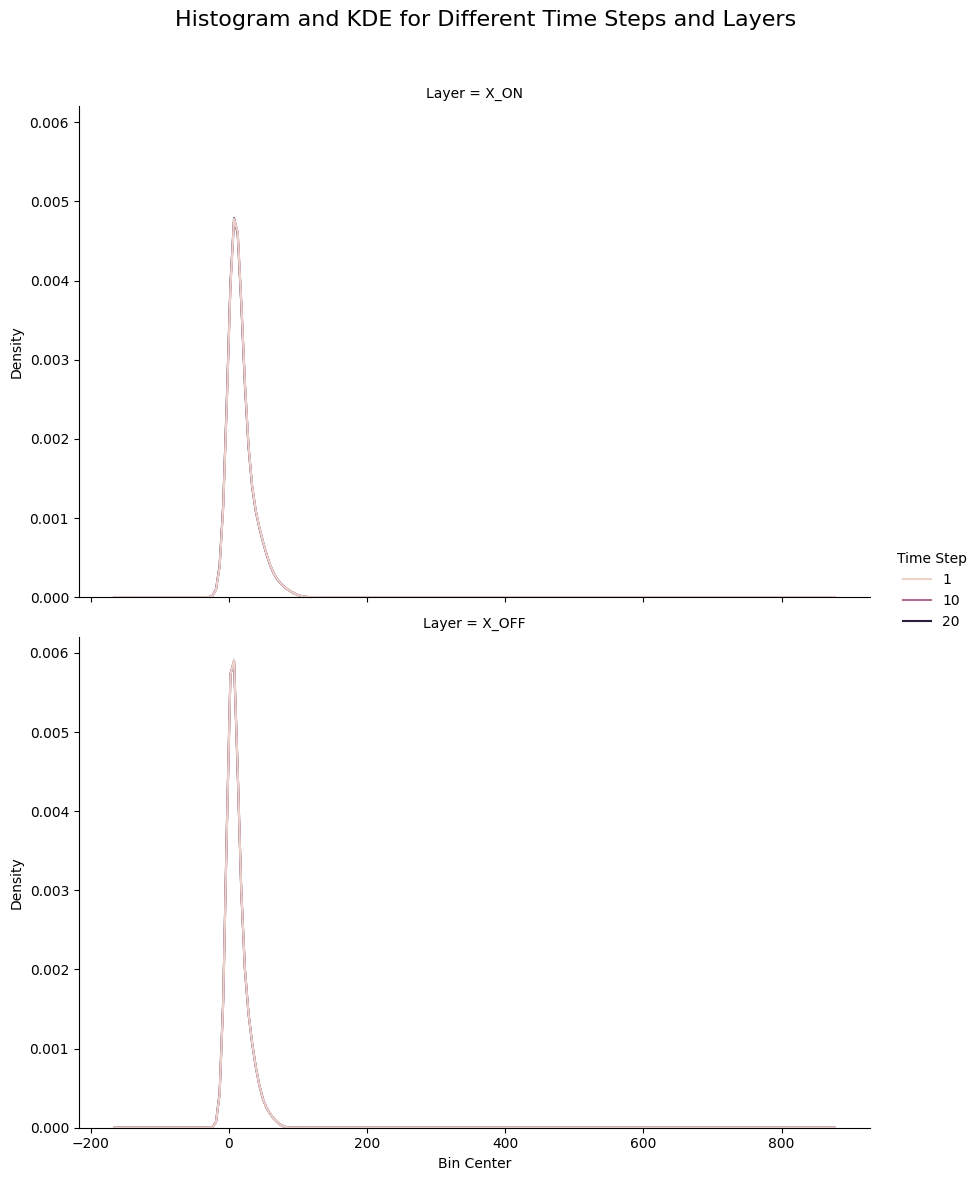

In [ ]:

# Specify the layers and time_step sizes to include
layers_to_plot = ["X_ON", "X_OFF"]  # Layers to plot
data = []
bins = [i for i in range(num_bins)]
for time_step, (histogram_counts, bin_edges)  in time_step_results.items():
    for layer in layers_to_plot:
        # Extract the counts and bin centers
        counts = histogram_counts[layer]  # Already normalized distribution
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers

        # Append the data for this layer and time_step to the list
        for center, count in zip(bin_centers, counts):
            data.append({"Layer": layer, "Time Step": time_step, "Bin Center": center, "Count": count})

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Use sns.displot to plot the histogram and KDE for different time_step sizes
sns.displot(
    data=df,
    x="Bin Center",
    weights="Count",
    kind="hist",
    bins=bins,
    # kde=True,  # Overlay the KDE
    hue="Time Step",  # Differentiate time_step sizes by color
    row="Layer",  # Separate plots for each layer
    height=6,
    aspect=1.5,
    # palette="Spectral",
)
sns.displot(
    data=df,
    x="Bin Center",
    weights="Count",
    kind="kde",
    hue="Time Step",  # Differentiate time_step sizes by color
    row="Layer",  # Separate plots for each layer
    height=6,
    aspect=1.5,
    # palette="viridis",
)

# Add labels and title
plt.subplots_adjust(top=0.9)  # Adjust space for the title
plt.suptitle("Histogram and KDE for Different Time Steps and Layers", fontsize=16)
plt.show()

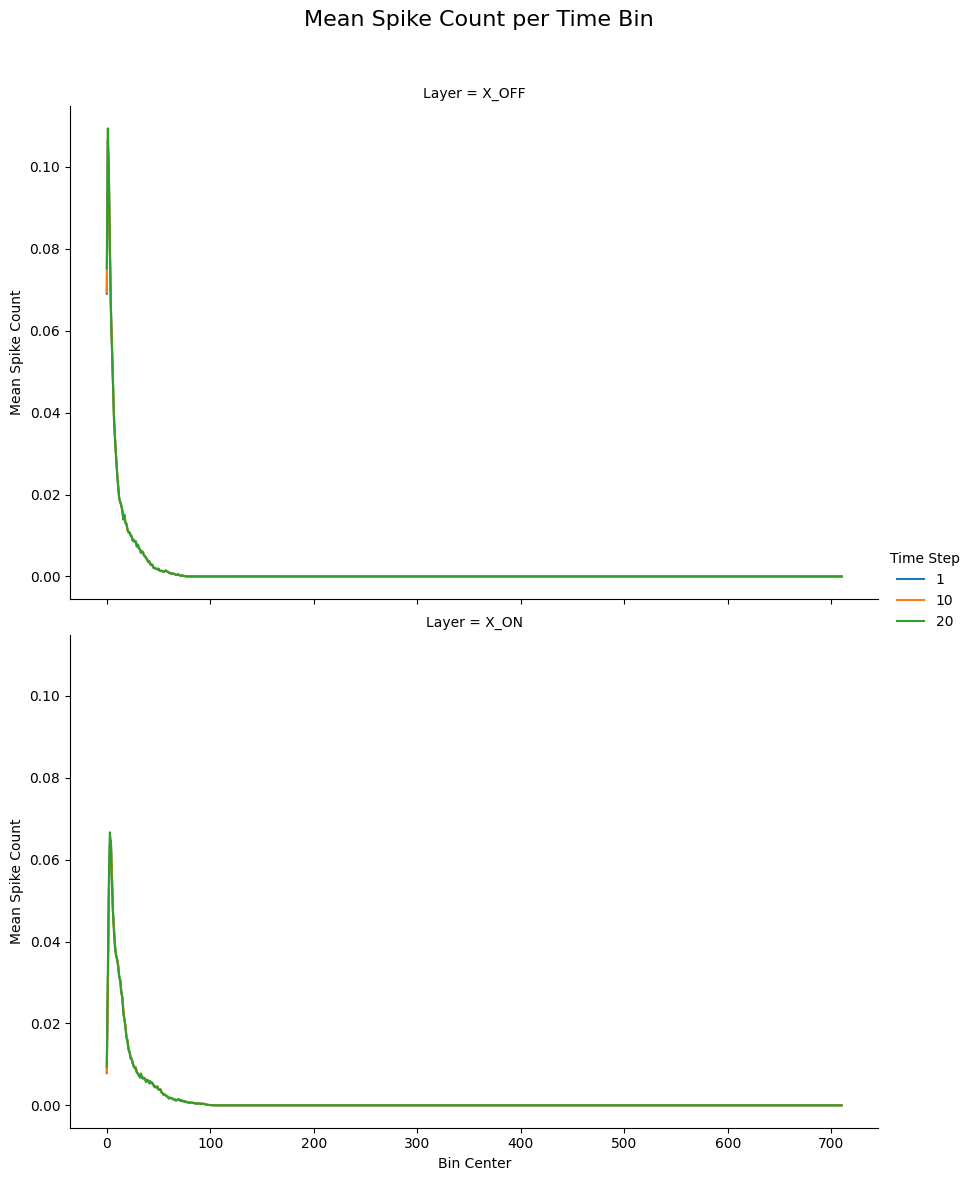

In [ ]:
# Step 1: Calculate the mean spike count for each time bin
df["Bin Center"] = df["Bin Center"] - 0.5
mean_df = df.groupby(["Bin Center", "Layer", "Time Step"], as_index=False)["Count"].mean()

# Step 2: Plot the mean spike count
g = sns.FacetGrid(
    mean_df,
    row="Layer",  # Separate plots for each layer
    hue="Time Step",  # Different colors for each time step
    height=6,
    aspect=1.5,
    sharey=True,
    sharex=True,
)

g.map(sns.lineplot, "Bin Center", "Count")  # Plot mean spike count
g.set_axis_labels("Bin Center", "Mean Spike Count")
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.suptitle("Mean Spike Count per Time Bin", fontsize=16)
plt.show()

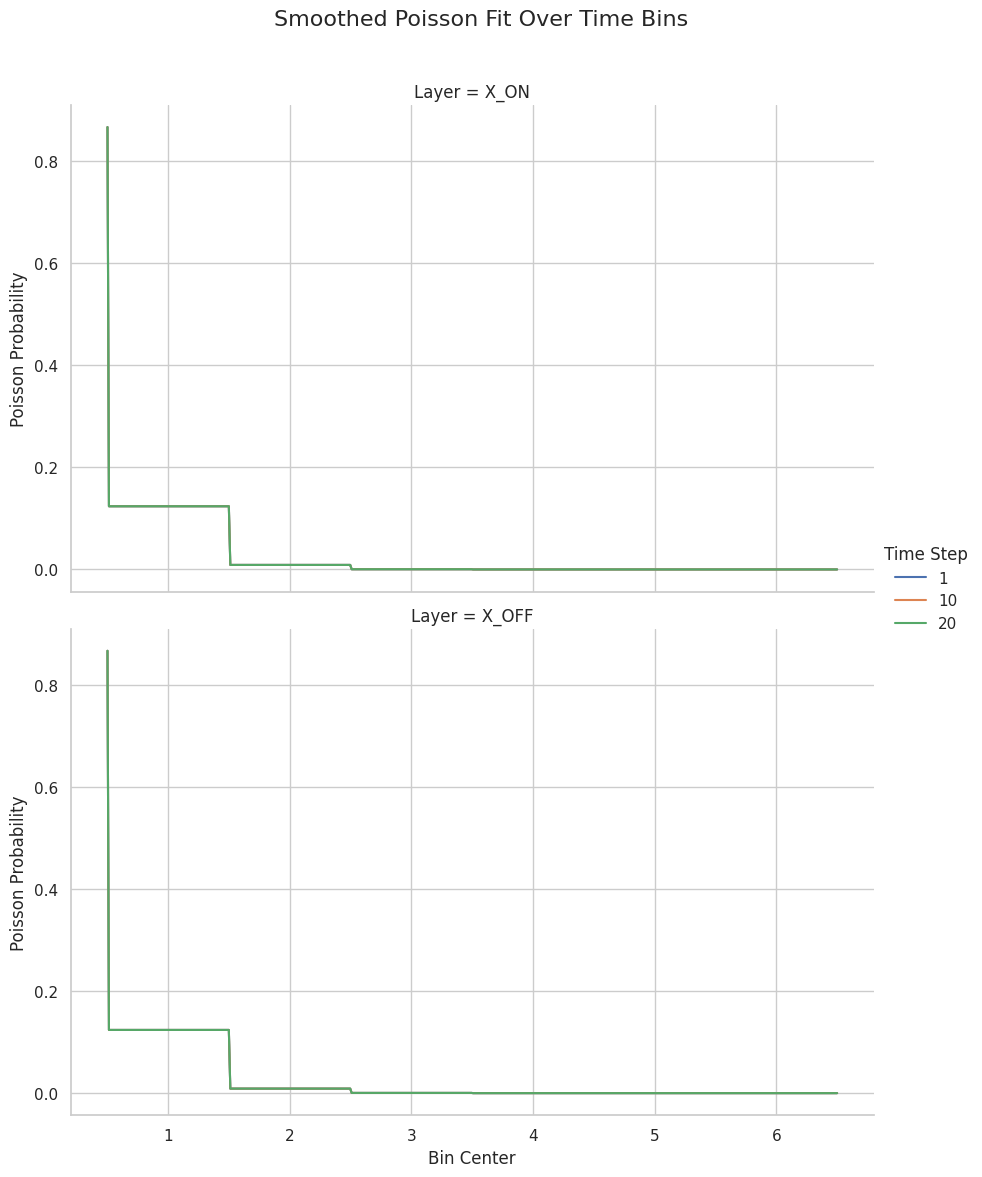

In [ ]:
# Step 3 (updated): Fit and create smooth Poisson curve
# -----------------------------------------------------
poisson_data = []

for layer in layers_to_plot:
    for time_step in df["Time Step"].unique():
        subset = df[(df["Layer"] == layer) & (df["Time Step"] == time_step)]

        values = subset["Count"].values
        if len(values) == 0:
            continue

        # Estimate Poisson λ from actual count distribution
        λ = np.mean(values)

        # Create a smooth x range based on bin centers
        x_min = subset["Bin Center"].min()
        x_max = subset["Bin Center"].max()
        x_vals = np.linspace(x_min, x_max, 500)  # Smooth points across time

        # Evaluate Poisson PMF at fractional bin centers
        poisson_smooth = poisson.pmf(np.round(x_vals).astype(int), mu=λ)

        poisson_df = pd.DataFrame({
            "Bin Center": x_vals,
            "Poisson Fit": poisson_smooth,
            "Layer": layer,
            "Time Step": time_step,
        })

        poisson_data.append(poisson_df)

poisson_df = pd.concat(poisson_data, ignore_index=True)

g = sns.FacetGrid(
    poisson_df,
    row="Layer",
    hue="Time Step",
    height=6,
    aspect=1.5,
    sharex=True,
    sharey=True,
)
g.map(sns.lineplot, "Bin Center", "Poisson Fit")
g.set_axis_labels("Bin Center", "Poisson Probability")
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.suptitle("Smoothed Poisson Fit Over Time Bins", fontsize=16)
plt.show()



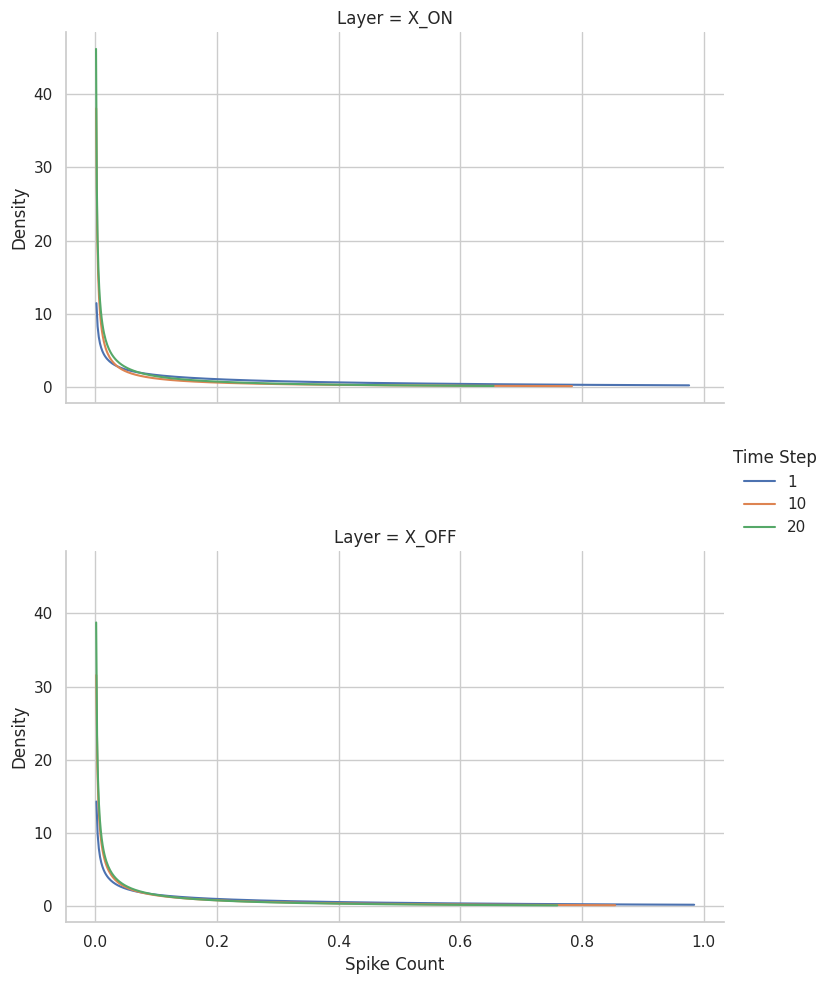

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(
    pdf_df,
    row="Layer",
    hue="Time Step",
    height=5,
    aspect=1.5,
    sharex=True,
    sharey=True,
)

g.map(sns.lineplot, "Fitted Count", "Density")

g.add_legend()
g.set_axis_labels("Spike Count", "Density")
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
print(nn_model.globals.DEFAULT_PATHS)

{'train_dir': '/home/david/source/diplomka/dataset/train_dataset/compressed_spikes/trimmed/size_5', 'test_dir': '/home/david/source/diplomka/dataset/test_dataset/compressed_spikes/trimmed/size_5', 'subset_dir': '/home/david/source/diplomka/dataset/model_subsets/size_10.pkl', 'model_dir': '/home/david/source/diplomka/evaluation_tools/evaluation_results/best_models/', 'experiment_selection_path': '/home/david/source/diplomka/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl', 'neuron_selection_path': '/home/david/source/diplomka/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl', 'selection_results_dir': '/home/david/source/diplomka/evaluation_tools/evaluation_results/neuron_responses/', 'full_evaluation_dir': '/home/david/source/diplomka/evaluation_tools/evaluation_results/full_evaluation_results/', 'neuron_model_responses_dir': '/home/david/source/diplomka/evaluation_tools/evaluation_results/neuron_model_responses/'}


In [ ]:
# nn_model.globals.TIME_STEP = 10
print(nn_model.globals.TIME_STEP)

5


In [ ]:
TRAIN_DIR = nn_model.globals.DEFAULT_PATHS[PathDefaultFields.TRAIN_DIR.value]
TEST_DIR = nn_model.globals.DEFAULT_PATHS[PathDefaultFields.TEST_DIR.value]

# RESPONSES_DIR_BASE = "/home/beinhaud/diplomka/mcs-source/thesis_results/full_evaluation_results/"
RESPONSES_DIR_BASE = "/home/david/source/diplomka/thesis_results/simple/full_evaluation_results/"
# MODEL_NAME = "model-10_sub-var-0_step-20_lr-7.5e-06_simple_optim-steps-1_neuron-layers-5-size-10-activation-leakytanh-res-False_hid-time-1_grad-clip-10000.0_optim-default_weight-init-default_synaptic-False-size-10-layers-1"
MODEL_NAME = "model-10_sub-var-9_step-20_lr-7.5e-06_simple_optim-steps-1_neuron-layers-5-size-10-activation-leakytanh-res-False_hid-time-1_grad-clip-10000.0_optim-default_weight-init-default_synaptic-False-size-10-layers-1"

RESPONSES_DIR = RESPONSES_DIR_BASE + MODEL_NAME + "/"

In [ ]:

response_analyzer = ResponseAnalyzer(TRAIN_DIR, TEST_DIR, responses_dir=RESPONSES_DIR, data_workers_kwargs=data_workers_kwargs)

FileNotFoundError: [Errno 2] No such file or directory: '/home/david/source/diplomka/dataset/train_dataset/compressed_spikes/trimmed/size_5/X_ON'

# Create Histogram

  0%|          | 0/90 [00:00<?, ?it/s]

100%|██████████| 90/90 [00:03<00:00, 27.24it/s]


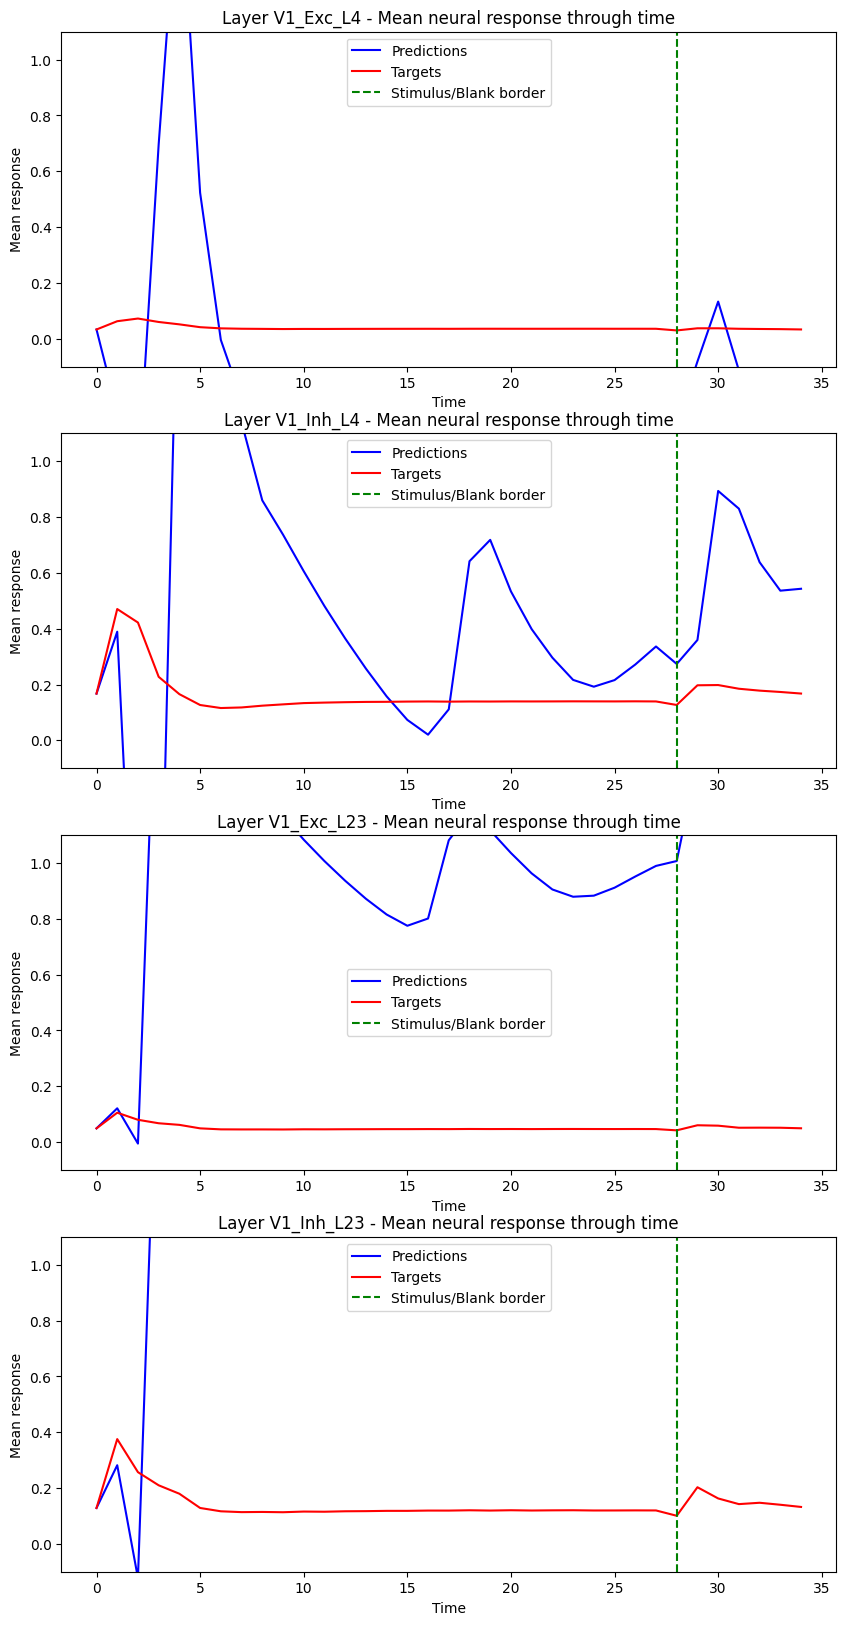

In [ ]:
response_analyzer.get_mean_from_evaluated_data()
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_layer_responses, True, y_range=(-0.1, 1.1))